<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">STROKE PREDICTION</h1>
<h1 style="font-family:Georgia;font-size:175%;text-align:center">Through this data we will try to know more about strokes and Make a model to try to predict strokes</h1>
<h1 style="font-family:Georgia;font-size:150%;text-align:left">What is a stroke?</h1>

*  Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes 

<h1 style="font-family:Georgia;font-size:150%;text-align:left">Risk factors for having a stroke include:</h1>

* Age: People aged 55 years and over

* Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

* Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

* Smoking

* Diabetes

* Obesity: if the body mass index (BMI) is 30 or more

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Import Libraries</h1>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import warnings
warnings.filterwarnings('ignore')

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Read Dataset</h1>

In [9]:
data = pd.read_csv("stroke_data.csv")

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Exploratory Data Analysis</h1>

In [10]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
data.shape

(5110, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Categorical Variable Visualization</h1>

In [24]:
def categorical(columns):
    plt.figure(figsize = (17,6))
    plt.subplot(1, 2, 1)
    plt.pie(x = data[columns].value_counts(), labels = data[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = data, hue = "stroke")
    print(data[columns].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


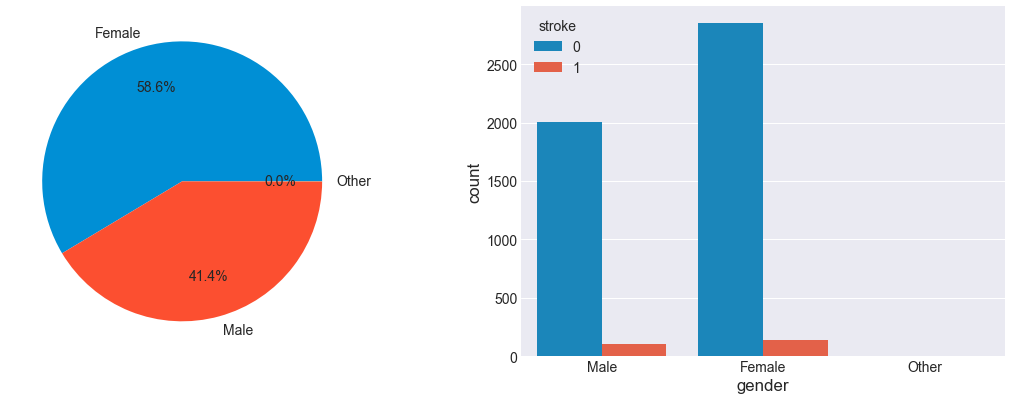

In [25]:
categorical("gender")

Yes    3353
No     1757
Name: ever_married, dtype: int64


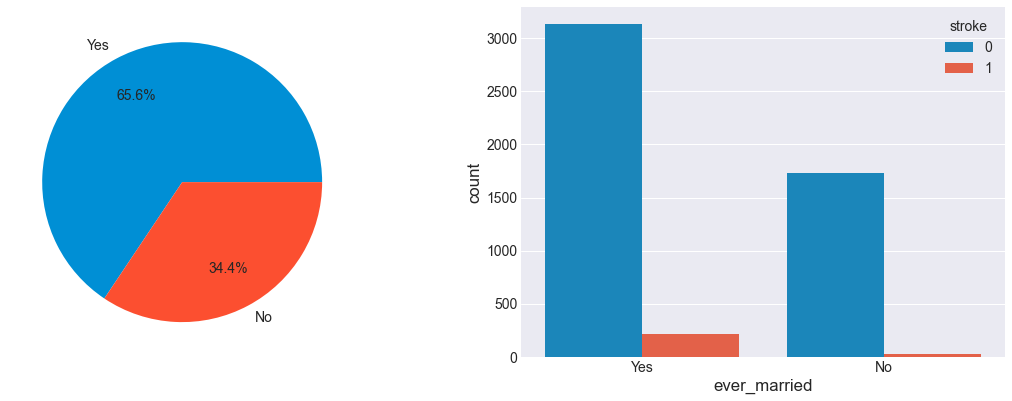

In [26]:
categorical("ever_married")

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


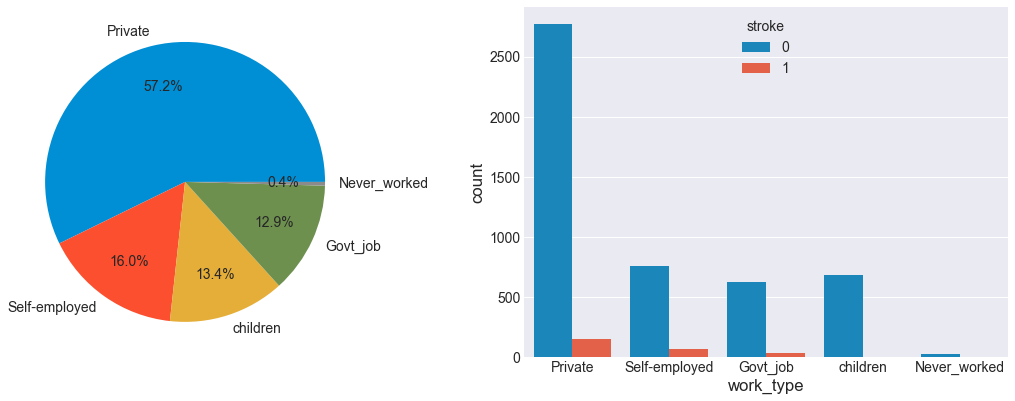

In [28]:
categorical("work_type")

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


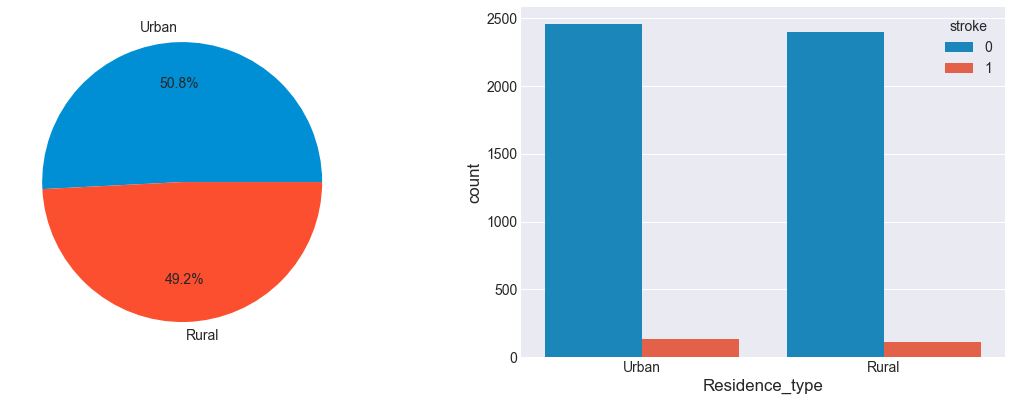

In [37]:
categorical("Residence_type")

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


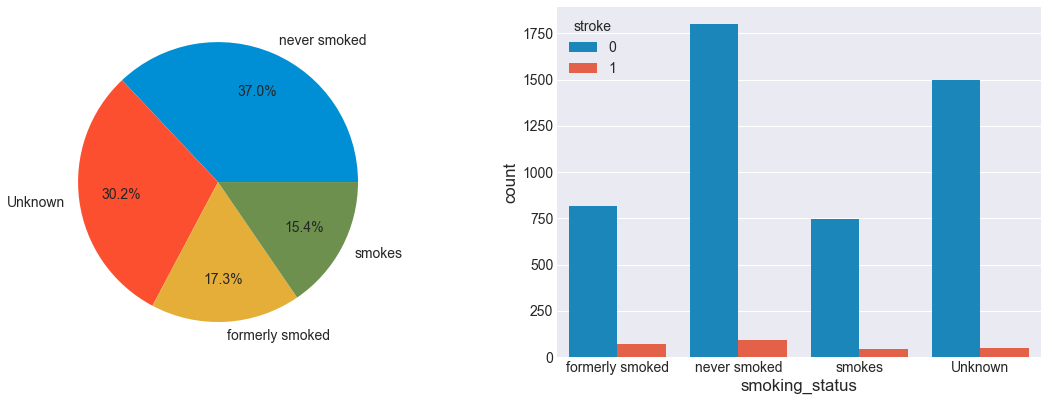

In [38]:
categorical("smoking_status")

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke or not in Categorical Features</h1>

In [61]:
cat_df = data[['gender','Residence_type','smoking_status',"ever_married", "work_type", 'stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42
ever_married   No               1728   29
               Yes              3133  220
work_type      Govt_job          624   33
               Never_worked       22    0
               Private          2776  149
               Self-employed     754   65
               children          685    2

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Numeric Variable Visualization</h1>

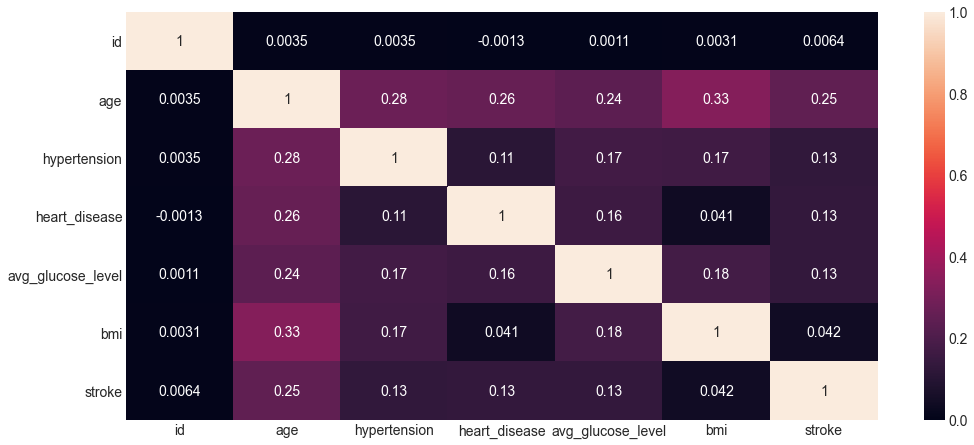

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True);

In [50]:
def numeric(columns, discrete = False):
    if discrete:
        plt.figure(figsize = (7,5))
        sns.countplot(x = columns, data = data, hue = "stroke")
        plt.show()
    else:
        plt.figure(figsize = (15,7))
        sns.jointplot(x = columns, y = "stroke", data = data, kind = "reg")

<Figure size 1080x504 with 0 Axes>

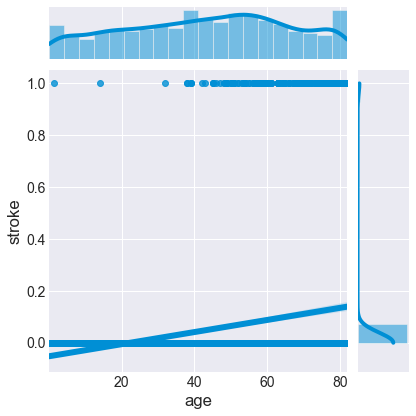

In [51]:
numeric("age")

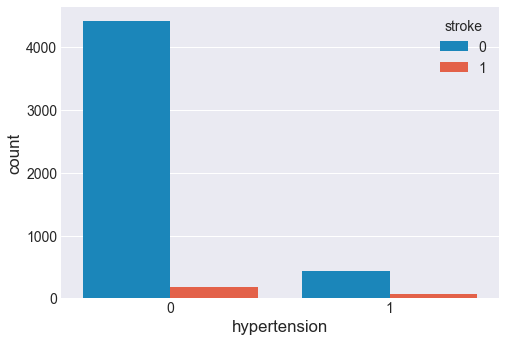

In [52]:
numeric("hypertension", True)

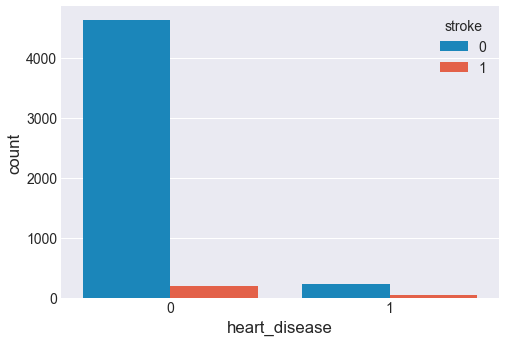

In [53]:
numeric("heart_disease", True)

<Figure size 1080x504 with 0 Axes>

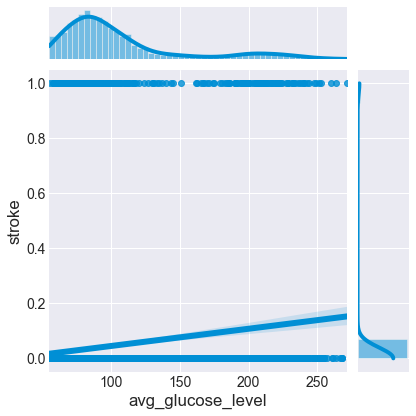

In [54]:
numeric("avg_glucose_level")

<Figure size 1080x504 with 0 Axes>

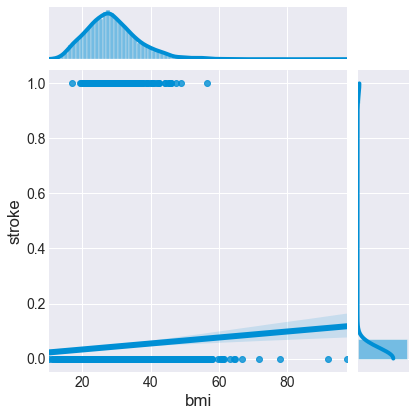

In [55]:
numeric("bmi")

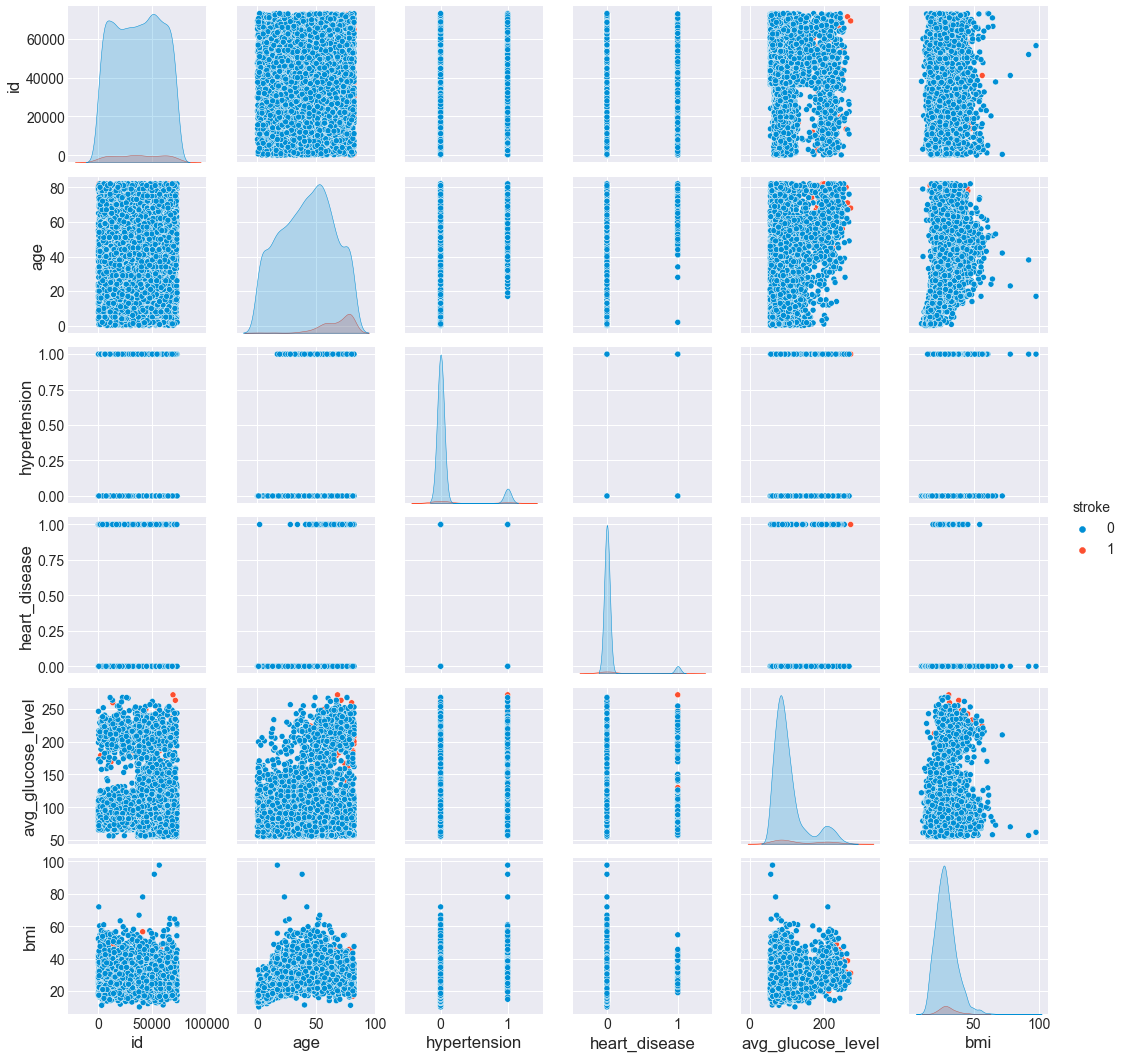

In [57]:
sns.pairplot(data, hue = "stroke")

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Missing Value</h1>

In [65]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [66]:
data["bmi"].fillna(data["bmi"].mean(), inplace = True)

In [67]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Outliers Detection</h1>

In [68]:
from collections import Counter
def outliers(data,columns):
    aykiri_indexler=[]
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 -Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
        aykiri_gozlemler = data[i][filtre]
        aykiri_index = aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    ortak_indexler = [i for i,v in aykiri_indexler.items() if v>2]
    return ortak_indexler

In [69]:
data.shape

(5110, 12)

In [70]:
x = data.select_dtypes(["float64", "int64"])
delete_index = outliers(data,x.columns)
data = data.drop(delete_index,axis=0).reset_index(drop=True)

In [71]:
data.shape

(5023, 12)

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Feature Engineering</h1>

In [76]:
data["gender"] = [1 if i == "Male" else 0 for i in data.gender]
data["ever_married"] = [1 if i == "Yes" else 0 for i in data.ever_married]
data["Residence_type"] = [1 if i == "Urban" else 0 for i in data["Residence_type"]]

data = pd.get_dummies(data=data, columns=['smoking_status'])
data = pd.get_dummies(data=data, columns=['work_type'])

In [78]:
data.drop(["id"], axis = 1, inplace = True)

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Machine Learning Models</h1>

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [81]:
x = data.drop(["stroke"], axis = 1)
y = data["stroke"].values.reshape(-1,1)

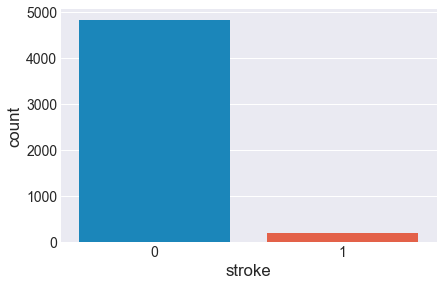

In [85]:
#Let's see weather our dataset is balanced or imbalanced
sns.countplot(data.stroke);

We can see that our dataset is imbalanced dataset.We are going to use smote technique to deal with our imablanced dataset

In [86]:
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x,y)

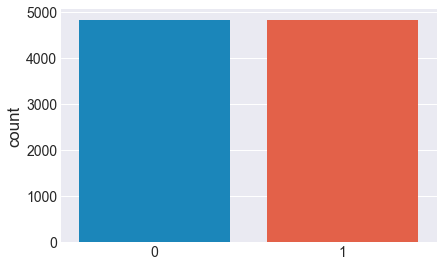

In [87]:
sns.countplot(y_smote);

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2 ,random_state = 42)

In [89]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Light GBM Classification</h1>

In [90]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
model = lgbc.fit(x_train, y_train)

In [91]:
model.score(x_train, y_train)

0.9923614707405489

In [93]:
print("Test accuracy :", accuracy_score(y_test, y_head))

Test accuracy : 0.9710144927536232


In [94]:
print(classification_report(y_test, y_head))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       987
           1       0.98      0.96      0.97       945

    accuracy                           0.97      1932
   macro avg       0.97      0.97      0.97      1932
weighted avg       0.97      0.97      0.97      1932

